# Mission to Mars
------------------------------
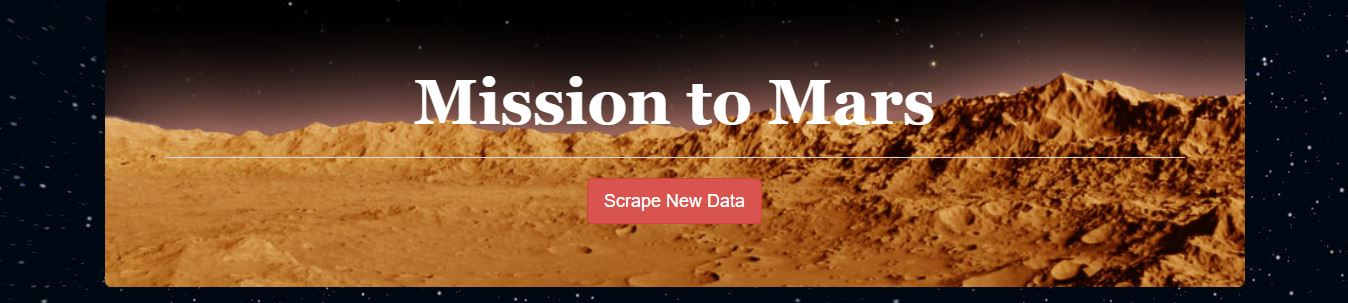

Web Scraping Project that collect information related to Mars from different websites and displays it in a single page. 


## Libraries and dependencies

In [54]:
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup
import pymongo
import pprint
import requests
import time
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains 

## Chrome Driver Path

In [39]:
executable_path = {'executable_path': 'C:\\Users\\dawzk\\Desktop\\GitHubRepos\\Mission-Mars\\chromedriver.exe'}
browser = Browser('chrome', **executable_path)

## News Scraping
The most recent news article is collected from NASA website:

In [26]:
news_url = "https://mars.nasa.gov/news/"
browser.visit(news_url)

html = browser.html
soup = BeautifulSoup(html, "html.parser")

#Get most recent news title and content
news_title = soup.find(class_="content_title").text
time.sleep(3)
news_content = soup.find(class_="article_teaser_body").text

print(news_title)
print(news_content)

NASA's Curiosity Rover Aims to Get Its Rhythm Back
Rover engineers at JPL will try to restore percussive drilling on Mars this week, part of a larger series of tests that will last through summer.


## Image Scraping
The most recent Mars image posted in the JPL NASA website is retrieved collecting its URL:

In [10]:
jpl_url = "https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars"
browser.visit(jpl_url)
time.sleep(3)
browser.click_link_by_partial_text("FULL IMAGE")
time.sleep(3)
#Move to the next image
actions = ActionChains(browser.driver)
time.sleep(4)
actions.send_keys(Keys.ARROW_RIGHT)
actions.perform()
time.sleep(5)
browser.click_link_by_partial_text("more info")
time.sleep(3)
browser.click_link_by_partial_href("spaceimages/images/largesize")
time.sleep(3)

html = browser.html
soup = BeautifulSoup(html, "html.parser")

featured_image_url  = soup.img['src']

print(featured_image_url)

https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA19113_hires.jpg


## Weather Scraping
Latest Mars weather report is scraped from the Mars Weather twitter account:

In [25]:
weather_url = "https://twitter.com/marswxreport?lang=en"
browser.visit(weather_url)

weather_html = browser.html
soup = BeautifulSoup(weather_html, 'html.parser')

tweets = soup.find_all('p', class_="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text")

#Loop through Twitter account to find the most recent post related to Mars weather
for tweet in tweets:
    try:
        # Identify tweet text
        mars_weather = str(tweet.text)

        # Run only if tweet text starts with "Sol"
        if (mars_weather.startswith('Sol')):
            # Print results
            print(mars_weather)
            break
        else:
            continue


    except Exception as e:
        print(e)

Sol 2056 (May 19, 2018), Sunny, high 5C/41F, low -74C/-101F, pressure at 7.40 hPa, daylight 05:20-17:20


## Mars Facts Scraping
Useful information about Mars is collected from Space Facts website scraping a Mars Facts table:

In [34]:
facts_url = "https://space-facts.com/mars/"
browser.visit(facts_url)

facts_html = browser.html
soup = BeautifulSoup(facts_html, 'html.parser')

mars_table = soup.find('table', class_="tablepress tablepress-id-mars")
mars_facts = mars_table.find_all('tr')

key = []
value = []

#Loop to append all table data into Key and Value lists
for row in mars_facts:
    table_data = row.find_all('td')
    key.append(table_data[0].text)
    value.append(table_data[1].text)


In [35]:
mars_df = pd.DataFrame({
    "Property": key,
    "Value": value
})

mars_df

,Property,Value
0,Equatorial Diameter:,"6,792 km\n"
1,Polar Diameter:,"6,752 km\n"
2,Mass:,6.42 x 10^23 kg (10.7% Earth)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.52 AU)"
5,Orbit Period:,687 days (1.9 years)\n
6,Surface Temperature:,-153 to 20 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [36]:
#Convert into HTML
mars_facts_html = mars_df.to_html(header = False, index = False)
mars_facts_html

'<table border="1" class="dataframe">\n  <tbody>\n    <tr>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km\\n</td>\n    </tr>\n    <tr>\n      <td>Polar Diameter:</td>\n      <td>6,752 km\\n</td>\n    </tr>\n    <tr>\n      <td>Mass:</td>\n      <td>6.42 x 10^23 kg (10.7% Earth)</td>\n    </tr>\n    <tr>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.52 AU)</td>\n    </tr>\n    <tr>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)\\n</td>\n    </tr>\n    <tr>\n      <td>Surface Temperature:</td>\n      <td>-153 to 20 °C</td>\n    </tr>\n    <tr>\n      <td>First Record:</td>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <td>Recorded By:</td>\n      <td>Egyptian astronomers</td>\n    </tr>\n  </tbody>\n</table>'

## Mars Hemisphere Images Scraping
Images from all four Mars hemispheres are collected from Astrogeology website:

In [47]:
hemispheres_url = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(hemispheres_url)

hemispheres_html = browser.html
soup = BeautifulSoup(hemispheres_html, 'html.parser')

mars_hemispheres = soup.find_all('h3')

hemisphere_image_urls = []

#Loop to scrap all hemispheres
for row in mars_hemispheres:
    title = row.text
    browser.click_link_by_partial_text(title)
    time.sleep(3)
    
    img_html = browser.html
    soup_h = BeautifulSoup(img_html, 'html.parser')
    
    url_img = soup_h.find('div', class_='downloads').a['href']
    
    img_dict = {}
    img_dict['title'] = title
    img_dict['img_url'] = url_img
    
    hemisphere_image_urls.append(img_dict)
    
    browser.visit(hemispheres_url)

print(hemisphere_image_urls)

[<h3>Cerberus Hemisphere Enhanced</h3>, <h3>Schiaparelli Hemisphere Enhanced</h3>, <h3>Syrtis Major Hemisphere Enhanced</h3>, <h3>Valles Marineris Hemisphere Enhanced</h3>]
[{'title': 'Cerberus Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'}, {'title': 'Schiaparelli Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'}, {'title': 'Syrtis Major Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'}, {'title': 'Valles Marineris Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]


## Data Collection
All data scraped below is compilated into a single dictionary that is used to populate our <font color=red>**"Mission to Mars"**</font> website:

In [58]:
#Save all the scraped data in a dictionary
mars = {
        "name": "Mars",
        "news_title": news_title,
        "news_content": news_content,
        "featured_image_url": featured_image_url,
        "mars_weather": mars_weather,
        "mars_facts": mars_facts_html,
        "hemisphere_images": hemisphere_image_urls}

print(mars)

{'name': 'Mars', 'news_title': "NASA's Curiosity Rover Aims to Get Its Rhythm Back", 'news_content': 'Rover engineers at JPL will try to restore percussive drilling on Mars this week, part of a larger series of tests that will last through summer.', 'featured_image_url': 'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA19113_hires.jpg', 'mars_weather': 'Sol 2056 (May 19, 2018), Sunny, high 5C/41F, low -74C/-101F, pressure at 7.40 hPa, daylight 05:20-17:20', 'mars_facts': '<table border="1" class="dataframe">\n  <tbody>\n    <tr>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km\\n</td>\n    </tr>\n    <tr>\n      <td>Polar Diameter:</td>\n      <td>6,752 km\\n</td>\n    </tr>\n    <tr>\n      <td>Mass:</td>\n      <td>6.42 x 10^23 kg (10.7% Earth)</td>\n    </tr>\n    <tr>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.52 AU)</td>\n    </tr>\n    <tr>\n      <td>Orbit Perio